In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.patches as mpatches

import numpy as np # linear algebra
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import folium

In [2]:
df = pd.read_csv('Crime.csv')

C:\Users\neera\AppData\Local\Temp\ipykernel_19516\3189256431.py:1: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crime.csv')


In [3]:
df.head(1)

Incident ID Offence Code  CR Number    Dispatch Date / Time NIBRS Code  \
0    201202980         3550  180042096  08/23/2018 09:52:08 PM        35B   

   Victims            Crime Name1                Crime Name2  \
0        1  Crime Against Society  Drug Equipment Violations   

                        Crime Name3 Police District Name  ... Street Prefix  \
0  DRUGS - NARCOTIC EQUIP - POSSESS           GERMANTOWN  ...           NaN   

   Street Name Street Suffix  Street Type         Start_Date_Time  \
0  MIDDLEBROOK           NaN           RD  08/23/2018 09:52:00 PM   

  End_Date_Time   Latitude  Longitude Police District Number  \
0           NaN  39.177744 -77.265619                     5D   

              Location  
0  (39.1777, -77.2656)  

[1 rows x 30 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

In [5]:
df['HOUR']=pd.to_datetime(df['Start_Date_Time']).dt.hour #Adding Hour as seperate column

In [6]:
df['DAY_OF_WEEK']=pd.to_datetime(df['Start_Date_Time']).dt.weekday #Adding Weekdays as seperate column

In [7]:
df['MONTH']=pd.to_datetime(df['Start_Date_Time']).dt.month #Adding Month as seperate column

In [8]:
df['YEAR']=pd.to_datetime(df['Start_Date_Time']).dt.year #Adding Year as seperate column

In [9]:
bdf=df[['Incident ID','Beat','HOUR','DAY_OF_WEEK','MONTH', 'YEAR']] # Preparing subdata set for ploting

Dealing with Null and empty Valuse of data set

In [10]:
bdf=bdf.replace('%','',regex=True)
bdf=bdf.replace(',','',regex=True)
bdf=bdf.replace('-','',regex=True)
bdf=bdf.replace('',np.nan,regex = True )
bdf=bdf.replace('MAY90','')

In [11]:
bdf.dropna(inplace=True) # Drop all null values rows and columns
bdf.isnull().sum()

Incident ID    0
Beat           0
HOUR           0
DAY_OF_WEEK    0
MONTH          0
YEAR           0
dtype: int64

In [12]:
bdf.head(1) # retrieve a row to check dataset

Incident ID Beat  HOUR  DAY_OF_WEEK  MONTH  YEAR
0    201202980  5N1    21            3      8  2018

# Most dangerous time when crime occurred while patrolling 

In [13]:
x = bdf.groupby(['HOUR']).agg({'HOUR':['count']}).reset_index( ) # Calculating hourly crime

In [14]:
x.head() # Checking data of subdata set

HOUR       
        count
0    0  22985
1    1   9018
2    2   7979
3    3   5847
4    4   3912

In [15]:
x.columns = ['Hour', 'CrimeCount'] # Renaming count column as  CrimeCount

In [16]:
x.head(1)

Hour  CrimeCount
0     0       22985

In [17]:
#Define a function  for color coding of bar with respect to mean
def pick_colors_according_to_mean_count(crime_data):
    colors=[]
    avg= crime_data.CrimeCount.mean()
    for each in crime_data.CrimeCount:
        if each >avg*1.01:
            colors.append('lightcoral')
        elif each < avg*0.99:
            colors.append('green')
        else:
            colors.append['black']
    return colors

In [18]:
# Applying the function which we created above for picking color according to severance of the crime
Cr_color_code= pick_colors_according_to_mean_count(x) 

In [19]:
Cr_color_code # checks assigned color

['lightcoral',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral',
 'lightcoral']

## Identify which is the most dangerous and safest hour of the day and  week, and which is the most dangerous month of the year.

Maryland crime data with the idea of analyzing the graphs to show where, when, and what types of crime occur in Maryland. The overall goal of the analysis is to know when it is statistically more safe and more dangerous to be in Maryland, which areas are safer and more dangerous, and what types of crimes are committed most and least frequently.
Dataset The dataset being analysed on this page is data from 2016-2022. The dataset 
contains 306094 rows of data within 30 columns, representing a specific crime or 
location statistic. Dataset Variables: 'Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time','NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name', 'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place', 
'Setor', 'Beat', 'PRA', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix',
 'Street Type', 'Start_Date_Time', 'End_Date_Time', 'Latitude',  'Longitude',
 'Police District Number' and  'Location'.

Findings After analyzing these graphs, it has been found that crime in Maryland
 fluctutes depending on the hour of the day, location, and month. The top three crimes reported in Maryland were also found: This 
data could help Maryland citizens and visitors be safe and smart when planning when and where to go, where to live, and what to avoid.


In [20]:
#Preparing legend
Above = mpatches.Patch(color='lightcoral', label='Above Average')
At = mpatches.Patch(color='black', label='Within 1% of the Average')
Below = mpatches.Patch(color='green', label='Below Average')

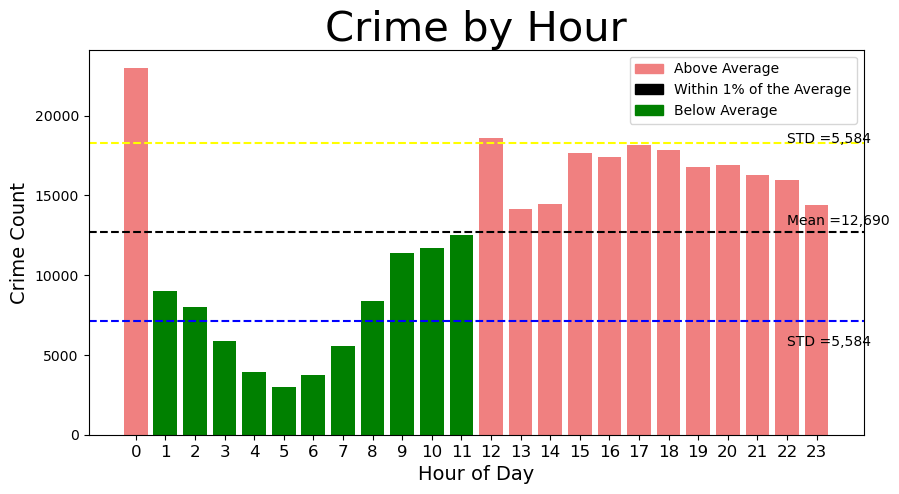

In [23]:
fig=plt.figure(figsize=(10,5)); # the fromat of Graph
ax = fig.add_subplot(1,1,1); #managing number of subplot
# Plotting data using bar graph
ax.bar(x.Hour, x.CrimeCount, label='Count', color=Cr_color_code); 
# setting format of legend
ax.legend(handles=[Above, At, Below],fontsize = 10);
#Caluting mean and ploting on the graph
plt.axhline(x.CrimeCount.mean(), color='black', linestyle='dashed');
# Calculating positve and negative standard deviation
plt.axhline(x.CrimeCount.mean() - x.CrimeCount.std(), color='blue', linestyle='dashed');
plt.axhline(x.CrimeCount.mean() + x.CrimeCount.std(), color='yellow', linestyle='dashed');

# Set title of the Graph
ax.set_title('Crime by Hour', size=30);
#Labelling X and Y axis
plt.xlabel('Hour of Day', fontsize=14);
plt.ylabel('Crime Count', fontsize=14);
#Displaying mean value on the graph
ax.text(22, x.CrimeCount.mean()+500, 'Mean ='+str("{:,.0f}".format(x.CrimeCount.mean())));
# Displaying Standard deviation value on the graph
ax.text(22, x.CrimeCount.std() + x.CrimeCount.mean() , 'STD ='+str("{:,.0f}".format(x.CrimeCount.std())));
ax.text(22, x.CrimeCount.std() , 'STD ='+str("{:,.0f}".format(x.CrimeCount.std())));

#Formating of lables
my_x_labels = [*range(0,24,1)];
plt.xticks(my_x_labels, fontsize=12, color='black');
# Displaying the graph
plt.show()

In [25]:
#Counts crime month wise
x1 = bdf.groupby(['MONTH', 'YEAR'])['YEAR'].count().reset_index(name='count')

In [26]:
x1.head(2) # Checking prepared dataset

MONTH  YEAR  count
0      1  2017   4636
1      1  2018   4440

In [27]:
#adding a seperate column 'count_hundreds'
x1['count_hundreds'] = round(x1['count']/100, 0)

In [28]:
x1.head() # Check dataset

MONTH  YEAR  count  count_hundreds
0      1  2017   4636            46.0
1      1  2018   4440            44.0
2      1  2019   4060            41.0
3      1  2020   4202            42.0
4      1  2021   3462            35.0

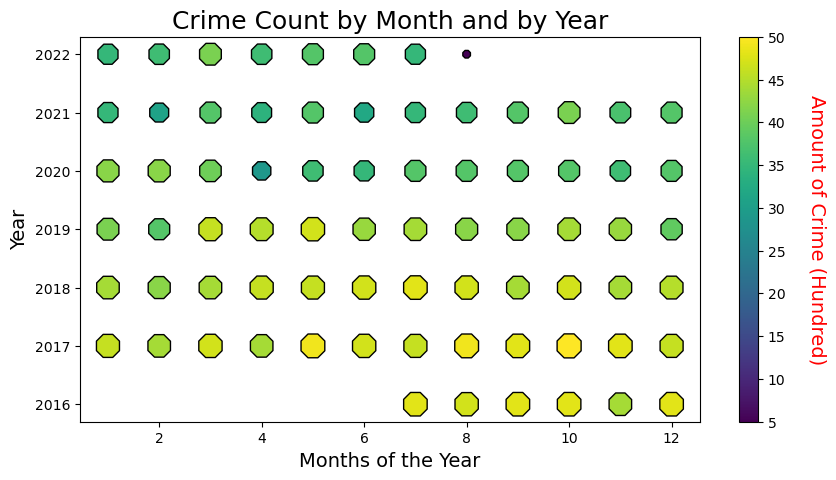

In [29]:
# the fromat of Graph
plt.figure(figsize=(10,5));
#Plotting the data using scatter plot
plt.scatter(x1['MONTH'], x1['YEAR'], marker='8', cmap='viridis', 
            c=x1['count_hundreds'], s=7*x1['count_hundreds'],
            edgecolors='Black');
#Setting Titles  and Labels of the graph
plt.title('Crime Count by Month and by Year', fontsize = 18);
plt.xlabel('Months of the Year', fontsize=14);
plt.ylabel('Year', fontsize = 14);

#Displaying the color bar
cbar = plt.colorbar();
cbar.set_label('Amount of Crime (Hundred)', rotation=270, fontsize=14, color='red', labelpad=30);

 #show the graph
plt.show()

In [30]:
#Calculating hourly crime data 
x = bdf.groupby(['DAY_OF_WEEK', 'HOUR'])['HOUR'].count().reset_index(name='count')
x

DAY_OF_WEEK  HOUR  count
0              0     0   3307
1              0     1   1002
2              0     2    862
3              0     3    638
4              0     4    483
..           ...   ...    ...
163            6    19   1967
164            6    20   2053
165            6    21   1970
166            6    22   1934
167            6    23   1692

[168 rows x 3 columns]

In [31]:
set(bdf['DAY_OF_WEEK']) # Checking unique value of weedays

{0, 1, 2, 3, 4, 5, 6}

In [32]:
#Calculating data hourly for everyday of the week
stacked_df = x.groupby(['HOUR', 'DAY_OF_WEEK'])['count'].sum().reset_index(name='TotalCrime')
#Renaming Column names
stacked_df.columns = ['Hour','WeekDay','TotalCrime']
#Converting dataframe into pivot 
stacked_df = stacked_df.pivot(index = 'Hour', columns='WeekDay', values='TotalCrime')
#Preparing weekdays list
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#stacked_df = stacked_df.reindex(columns=reversed(day_order))

In [34]:
stacked_df.head(2) # check the converted pivot table

WeekDay     0     1     2     3     4     5     6
Hour                                             
0        3307  3059  3367  3344  3389  3384  3135
1        1002   913  1030  1073  1409  1904  1687

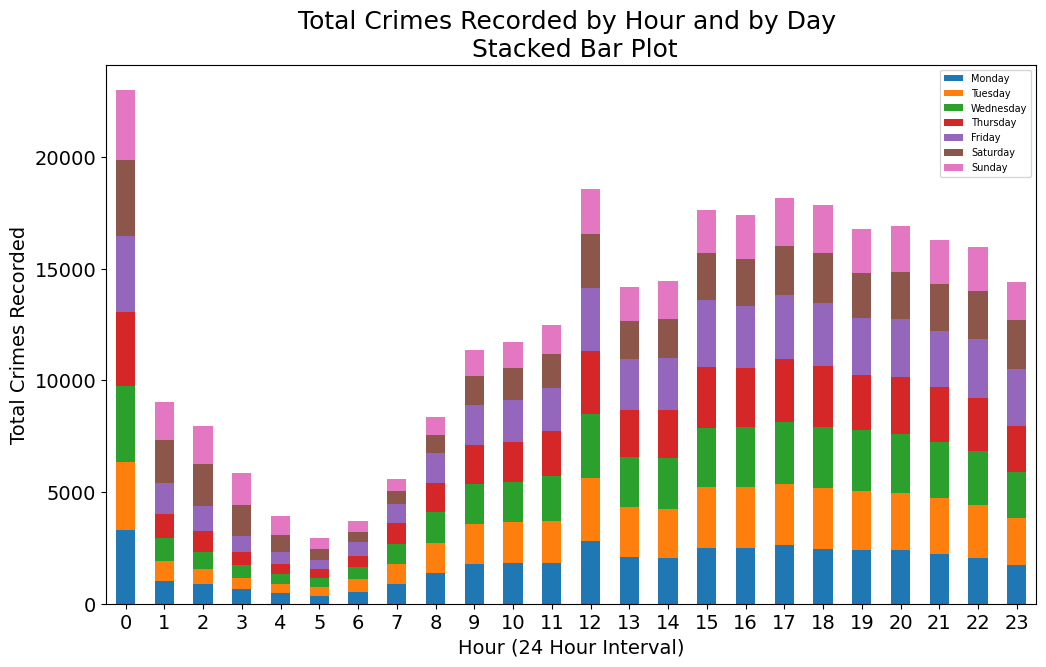

In [35]:
#Formatting th graph
fig = plt.figure(figsize = (12,7));
ax = fig.add_subplot(1,1,1); # Managing the subplot
#Plotting data as stacked bar
stacked_df.plot(kind='bar', stacked=True, ax=ax)
#Setting Titles  and Labels of the graph
plt.ylabel('Total Crimes Recorded', fontsize=14);
plt.title('Total Crimes Recorded by Hour and by Day \n Stacked Bar Plot', fontsize=18);
plt.xticks(rotation=0, horizontalalignment = 'center', fontsize= 14);
plt.yticks(fontsize=14);
ax.set_xlabel('Hour (24 Hour Interval)', fontsize = 14);
#Handling the legend
handles, labels = ax.get_legend_handles_labels();
plt.legend(handles, day_order, loc = 'best', fontsize = 7);
#show the graph
plt.show()

In [36]:
#pip intall folium 
#importing folium library for display crime trend over Geographical Map
import folium;
from folium import plugins

In [37]:
#Prepating the dataset for Geop map
map_df = df.groupby(['Crime Name1', 'Location', 'Latitude', 'Longitude', 'Start_Date_Time', 'City'])['Location'].count().reset_index(name='TotalCrime');
center_of_map = [39.045294, -77.067582]; # assign the center loaction of the Maryland
#Preparing the format of the map
my_map = folium.Map(location = center_of_map,
                    zoom_start = 11,
                    tile = 'openstreetmap',
                    width = '90%',
                    height = '100%',
                    left = '5%',
                    right = '5%',
                    top = '0%');

In [38]:
'''

tiles = ['cartodbpositron','openstreetmap','stamenterrain','stamentoner'];
for tile in tiles:
    folium.TileLayer(tile).add_to(my_map);
    
folium.LayerControl().add_to(my_map);

for i in range(0, len(map_df)):
    crime = map_df.loc[i, 'Crime Name1']
    if crime == 'Crime Against Property':
            color='green'
    elif crime == 'Crime Against Person':
            color='red'
    elif crime == 'Crime Against Society':
            color='blue'
    else:
            color = 'black';
           
    try:
        if (color != 'black'):
            folium.Circle(location = [map_df.loc[i, 'Latitude'], map_df.loc[i, 'Longitude']],
                         tooltip = map_df.loc[i, 'Crime Name1'],
                         popup = 'Date: {}: \n City: {}'.format(map_df.loc[i, 'Start_Date_Time'], map_df.loc[i, 'City']),
                         radius = 10,
                         color = color,
                         fill = True,
                         fill_color = color,
                         fill_opacity = 0.5).add_to(my_map);
                                                
    except:
        pass;

my_map

'''
print ('for Plotting circle on map taking huge space(600 MB) so we are avoidig to use this we use Geo heatmap')

for Plotting circle on map taking huge space(600 MB) so we are avoidig to use this we use Geo heatmap


In [43]:
m = folium.Map([39.190371, -77.069578], zoom_start=10)
# convert to (n, 2) nd-array format for heatmap
dfmatrix = map_df[['Latitude', 'Longitude']].values
# plot heatmap
m.add_child(plugins.HeatMap(dfmatrix, radius=15))
m
#m.save('Crimeheatmap.jpg')